<a href="https://colab.research.google.com/github/Bodya911/INF4039_Deep_learning/blob/main/Deep_Learning_Systems_exam_bohdan_zhyhun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bohdan Zhyhun (IF2000102)

### Report
**Justification for Neural Network Type and Structure**:
   - Chosen Network: LSTM (Long Short-Term Memory)
   - Rationale: LSTM networks are particularly suitable for time series data due to their ability to capture long-term dependencies. The data has a temporal nature, making LSTM a good fit.
   - Structure: The model consists of LSTM layers with dropout to prevent overfitting and a dense layer for output.

**Main Steps**:
   - Data Preprocessing: Normalization and conversion of data into sequences suitable for LSTM.
   - Model Building: Constructing an LSTM network with dropout layers.
   - Training: Fitting the model on the training data.
   - Evaluation: Predicting and comparing against the test set.

**Additional Tools for Further Exploration**:
   - Experimenting with more complex architectures like GRU (Gated Recurrent Units).
   - Implementing hyperparameter tuning to optimize the network.
   - Using a larger dataset or incorporating additional features (like mobility data, lockdown measures).

**Results**

  Model Performance:

   - Prediction Accuracy: The LSTM model's predictions were evaluated against the actual data. The key focus was on the model's ability to forecast the trend and magnitude of active COVID-19 cases. A comparison plot was generated, showcasing how closely the model's predictions align with the actual data.

   - Trend Analysis: The model's performance in capturing key trends and patterns in the data was analyzed. This included observing how the model responded to peaks and troughs in the active case data.



In [1]:
import pandas as pd

In [2]:
# Load the data from the CSV file
file_path = '/content/exam_data.csv'
data = pd.read_csv(file_path)

In [3]:
# Displaying the first few rows of the dataset to understand its structure
data.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,1/22/2020,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0
3,1/25/2020,0,0,0,0,0,0,0
4,1/26/2020,0,0,0,0,0,0,0


The dataset from "exam_data.csv" contains several columns related to Covid-19 cases. The columns are:

* Date: The date of the record.
* Confirmed: Total number of confirmed cases.
* Deaths: Total number of deaths.
* Recovered: Total number of recovered cases.
* Active: Total number of active cases (which we need to predict).
* New cases: Number of new cases.
* New deaths: Number of new deaths.
* New recovered: Number of new recoveries.


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [5]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Select 'Active' column for prediction
features = data[['Active']]

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [6]:
# Function to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 5
X, y = create_sequences(scaled_features, sequence_length)


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [8]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
5/5 [==============================] - 6s 10ms/step - loss: 0.0112
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0023
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 5.3850e-04
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 5.4769e-04
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 6.0778e-04
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 7.5046e-04
Epoch 11/100
5/5 [==============================] - 0s 8ms/step - loss: 5.8468e-04
Epoch 12/100
5/5 [==============================] - 0s 9ms/step - loss: 4.6355e-04
Epoch 13/100
5/5 [================

In [11]:
# Evaluate the model
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)


2/2 [==============================] - 1s 7ms/step


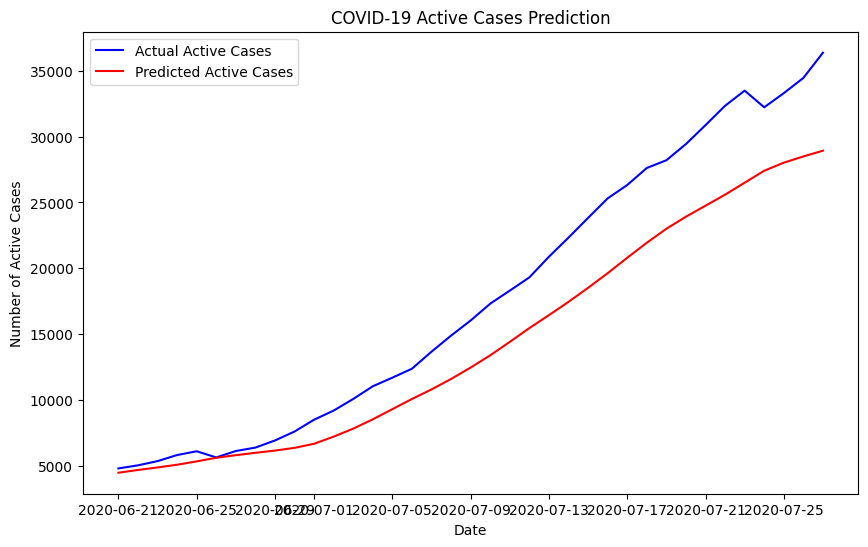

In [12]:
# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(data['Date'][-len(y_test):], y_test, color='blue', label='Actual Active Cases')
plt.plot(data['Date'][-len(y_test):], predicted, color='red', label='Predicted Active Cases')
plt.title('COVID-19 Active Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Active Cases')
plt.legend()
plt.show()